In [4]:
import requests
import re
import json
import pandas as pd
import datetime
import numpy as np

import geopandas as gpd

import plotly
import plotly.express as px
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from dash import dash_table
from jupyter_dash import JupyterDash

pd.set_option('display.max_columns', None) 
pd.options.mode.chained_assignment = None

In [6]:
x = gpd.read_file('geojson_clean2.geojson')
x

,kwd_ypes,geometry
0,9191,"MULTIPOLYGON (((478558.812 4199936.000, 478583..."
1,9170,"MULTIPOLYGON (((480042.312 4212790.000, 480048..."
2,9172,"MULTIPOLYGON (((481198.812 4214116.000, 481244..."
3,9180,"MULTIPOLYGON (((473922.000 4212995.000, 474629..."
4,9181,"MULTIPOLYGON (((470978.594 4206591.000, 470997..."
5,9195,"MULTIPOLYGON (((477383.812 4197610.000, 477418..."
6,9174,"MULTIPOLYGON (((477996.188 4211176.000, 478008..."
7,9201,"MULTIPOLYGON (((473476.812 4199280.000, 473643..."
8,9189,"MULTIPOLYGON (((477683.821 4200833.448, 477837..."
9,9175,"MULTIPOLYGON (((483179.594 4205708.000, 483216..."


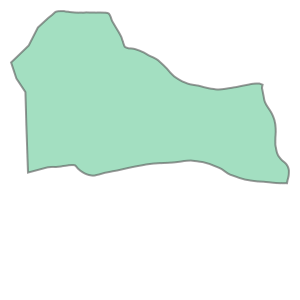

In [10]:
x.loc[0, "geometry"]

In [11]:
y = pd.DataFrame(x)

In [15]:
a = x.loc[0, "geometry"]
type(a)

shapely.geometry.multipolygon.MultiPolygon

In [16]:
dir(a)

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'geoms',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_i

In [22]:
dir(a.geoms)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_geom_item',
 '_parent']

In [24]:
import json
import pyproj

# Load the GeoJSON file
with open('geojson_clean2.geojson') as f:
    data = json.load(f)

# Define the source and target coordinate systems
src_crs = pyproj.CRS.from_epsg(2100)
target_crs = pyproj.CRS.from_epsg(4326)

# Create a transformer to convert coordinates
transformer = pyproj.Transformer.from_crs(src_crs, target_crs, always_xy=True)

# Convert the coordinates in the GeoJSON features
for feature in data['features']:
    geometry = feature['geometry']
    coordinates = geometry['coordinates']

    # If it's a Point, convert the single coordinate
    if geometry['type'] == 'Point':
        x, y = coordinates
        lon, lat = transformer.transform(x, y)
        geometry['coordinates'] = [lon, lat]
    
    # If it's a Polygon or MultiPolygon, convert each set of coordinates
    elif geometry['type'] in ['Polygon', 'MultiPolygon']:
        for ring in coordinates:
            for i, point in enumerate(ring):
#                 x, y = point
                lon, lat = transformer.transform(point[0], point[1])
                ring[i] = [lon, lat]

# Save the converted GeoJSON to a new file
with open('output.geojson', 'w') as f:
    json.dump(data, f)


In [25]:
data

{'type': 'FeatureCollection',
 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::2100'}},
 'features': [{'type': 'Feature',
   'properties': {'kwd_ypes': '9191'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[23.808109282782908, 61.83486278760088],
       [4.332115834373292, 31.59808832718484]]]]}},
  {'type': 'Feature',
   'properties': {'kwd_ypes': '9170'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[23.821476164342386, 61.98539799067573],
       [4.345372876119127, 31.652094425890247]]]]}},
  {'type': 'Feature',
   'properties': {'kwd_ypes': '9172'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[23.831896870786636, 62.00092553064063],
       [4.356196263100229, 31.65763172328508]]]]}},
  {'type': 'Feature',
   'properties': {'kwd_ypes': '9180'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[23.766331169653252, 61.98753359862246],
       [4.296332574628835, 31.65239880951214]]]]}},
  {'type': 'F

In [30]:
len(data['features'])

33

In [31]:
feature

{'type': 'Feature',
 'properties': {'kwd_ypes': '9178'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[23.88066965140948, 61.95611383697661],
     [4.404869999030178, 31.641599895762564]]]]}}

In [32]:
import json
import pyproj

# Load the GeoJSON file
with open('geojson_clean2.geojson') as f:
    data = json.load(f)

# Define the source and target coordinate systems
src_crs = pyproj.CRS.from_epsg(2100)
target_crs = pyproj.CRS.from_epsg(4326)

# Create a transformer to convert coordinates
transformer = pyproj.Transformer.from_crs(src_crs, target_crs, always_xy=True)

# Convert the coordinates in the GeoJSON features
for feature in data['features']:
    geometry = feature['geometry']
    coordinates = geometry['coordinates']

    def convert_coordinates(coords):
        if isinstance(coords[0], list):
            # If it's a MultiPolygon, recursively convert each set of coordinates
            return [convert_coordinates(sub_coords) for sub_coords in coords]
        else:
            # Convert the coordinates
            x, y = coords
            lon, lat = transformer.transform(x, y)
            return [lon, lat]

    converted_coords = convert_coordinates(coordinates)
    geometry['coordinates'] = converted_coords

# Save the converted GeoJSON to a new file
with open('output.geojson', 'w') as f:
    json.dump(data, f)
